In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [16]:
df_geo = pd.read_csv('df_geo.csv')

In [17]:
df_geo.head()

,Latitude,Longitude,Regiao,Faturamento
0,-23.545033,-46.644154,Centro,3094
1,-23.551383,-46.634206,Centro,3371
2,-23.543523,-46.633427,Centro,3891
3,-23.534770,-46.638023,Centro,4756
4,-23.552342,-46.631613,Centro,1129


In [18]:
try:
    mapa_img = mpimg.imread('mapa_brasil.png')
    tem_imagem = True
except FileNotFoundError:
    print("Imagem 'mapa_brasil.png' não encontrada")
    tem_imagem = False

In [19]:
#mapa_sp = mpimg.imread('sp.png') 

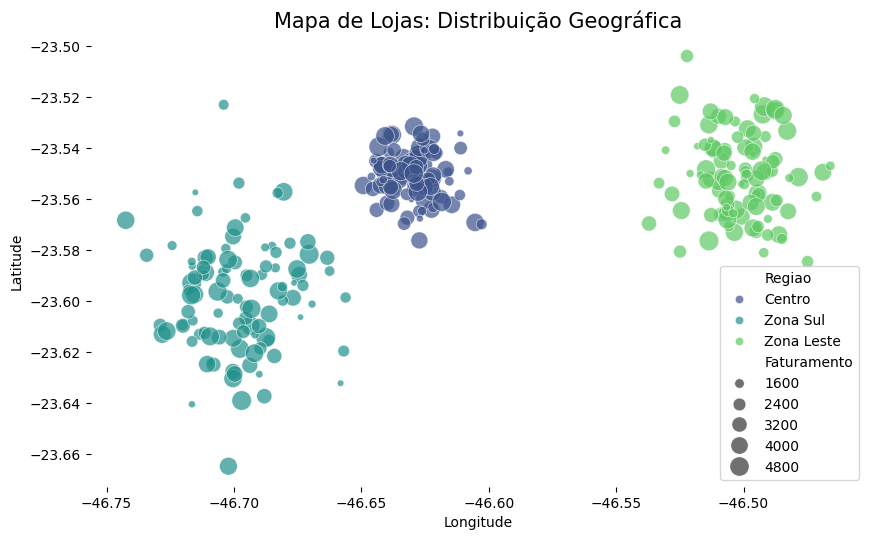

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))

# Incrementando o Mapa com mais informações
sns.scatterplot(data=df_geo, 
                x='Longitude', 
                y='Latitude', 
                hue='Regiao',      # Cor por bairro
                size='Faturamento', # Tamanho da bolinha por venda
                sizes=(20, 200),    # Controle do tamanho mínimo e máximo
                palette='viridis', 
                alpha=0.7,          # Transparência ajuda a ver sobreposição
                ax=ax)

# AJUSTES DE MAPA
ax.set_title('Mapa de Lojas: Distribuição Geográfica', fontsize=15)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax.set_aspect('equal') # Manter proporção correta de escala

# Remover as bordas para parecer mais um mapa limpo
sns.despine(left=True, bottom=True)

plt.show()

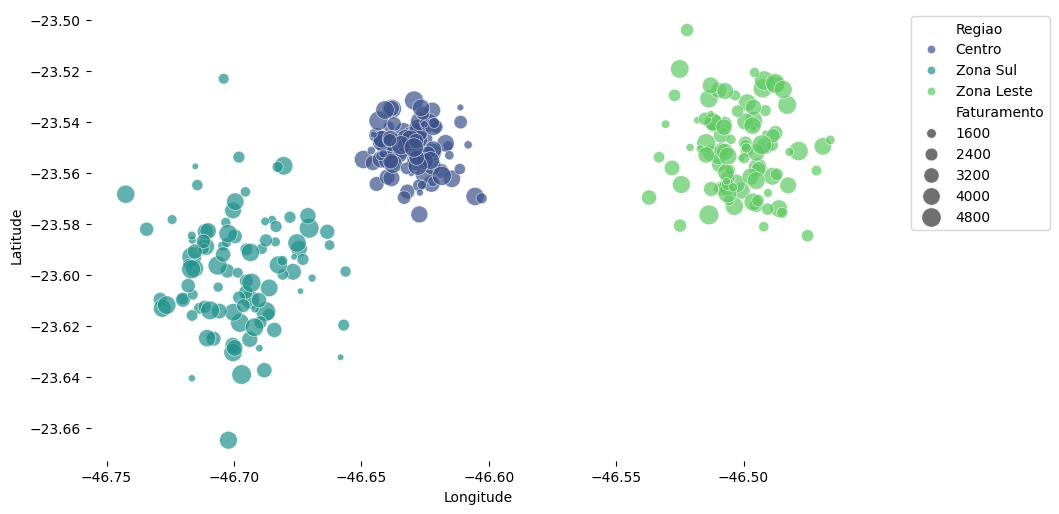

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))

# Incrementando o Mapa com mais informações
sns.scatterplot(data=df_geo, 
                x='Longitude', 
                y='Latitude', 
                hue='Regiao',      # Cor por bairro
                size='Faturamento', # Tamanho da bolinha por venda
                sizes=(20, 200),    # Controle do tamanho mínimo e máximo
                palette='viridis', 
                alpha=0.7,          # Transparência ajuda a ver sobreposição
                ax=ax)




# Deixar legenda fora do gráfico
ax.legend(bbox_to_anchor=(1.05, 1))    
ax.set_aspect('equal') # Manter proporção correta de escala
# Remover as bordas para parecer mais um mapa limpo
sns.despine(left=True, bottom=True)

plt.show()

In [22]:
df_vendas_br = pd.read_csv('df_vendas_br.csv')
df_vendas_br

,Longitude,Latitude,Estado,Vendas
0,-43.003777,-5.600517,SP,7601
1,-69.273682,-6.453998,BA,2384
2,-47.822312,-18.197427,RS,4364
3,-43.791864,-4.065624,SP,9348
4,-52.552255,-18.479077,BA,6651
...,...,...,...,...
195,-59.715896,-0.544954,SP,6036
196,-47.049564,-19.185441,SP,4013
197,-41.875108,-5.236064,MG,9589
198,-57.707527,-17.632878,BA,1257


In [23]:
df_vendas_br.describe()

,Longitude,Latitude,Vendas
count,200.000000,200.000000,200.000000
mean,-53.478095,-15.202606,5261.890000
std,9.638975,8.906228,2557.882517
min,-69.861811,-29.723367,1030.000000
25%,-61.661242,-23.158802,3284.000000
50%,-52.866283,-14.676894,5045.500000
75%,-45.140154,-6.969363,7408.000000
max,-35.433108,-0.142236,9951.000000


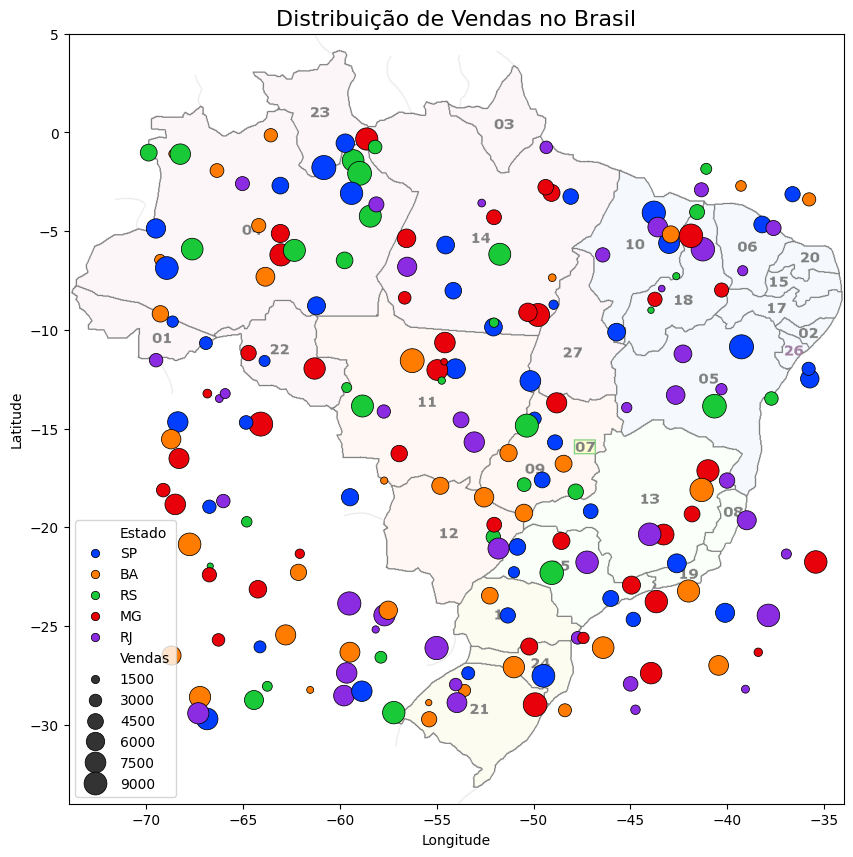

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))

brazil_extent = [-74, -34, -34, 5]

if tem_imagem:
    ax.imshow(mapa_img, extent=brazil_extent, aspect='auto', alpha=0.5)


sns.scatterplot(data=df_vendas_br, 
                x='Longitude', 
                y='Latitude', 
                hue='Estado', 
                size='Vendas',
                sizes=(20, 300),
                palette='bright', # Cores vivas para contrastar com o mapa
                edgecolor='black', # Borda preta ajuda a ver o ponto se o mapa for colorido
                ax=ax)


ax.set_title('Distribuição de Vendas no Brasil', fontsize=16)
ax.set_xlim(brazil_extent[0], brazil_extent[1])
ax.set_ylim(brazil_extent[2], brazil_extent[3])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

SSLError: HTTPSConnectionPool(host='tile.openstreetmap.org', port=443): Max retries exceeded with url: /5/9/15.png (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self-signed certificate in certificate chain (_ssl.c:1081)')))

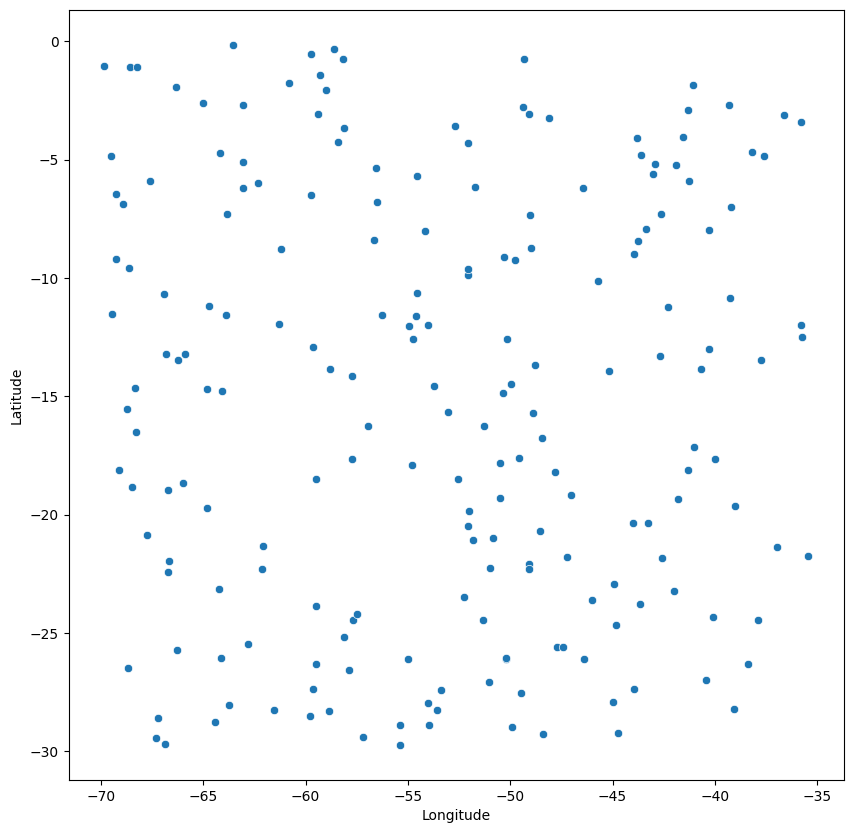

In [25]:
# Instalar antes: !pip install contextily
import contextily as ctx

fig, ax = plt.subplots(figsize=(10, 10))


sns.scatterplot(data=df_vendas_br, x='Longitude', y='Latitude', ax=ax)
ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))


sns.scatterplot(data=df_vendas_br, x='Longitude', y='Latitude', ax=ax)
ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.CartoDB.Positron)

plt.show()